0. Import the data and declare your package dependencies.

1. Briefly describe the data set. What information does it contain?

The dataset contains information on avocados from 2015 to 2020, including details such as average price, various bag sizes, avocado types, and geographical locations. It presents weekly sales data of avocados across different regions, offering insights into sales volumes influenced by several factors. The dataset includes avocado size categories, such as Small/Medium Hass Avocados (~3-5 oz, #4046), Large Hass Avocados (~8-10 oz, #4225), and Extra Large Hass Avocados (~10-15 oz, #4770) (reference appendix for more details). These variables help identify regional discrepancies and other factors affecting fluctuations in avocado prices.

2. Clean the data in any way you see fit.

In [35]:
#import packages
import pandas as pd
import numpy as np
from plotnine import *
#importing the data
avocado = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/avocado-updated-2020.csv")
#cleaning the data
#handling avocado names
avocado_clean = avocado.rename(columns = {"4046":"sm_md", "4225":"lg", "4770":"xl"})
#making the date a datetime variable
avocado_clean["date"] = pd.to_datetime(avocado_clean["date"])
#creating geography_type variable
#create new region classifications
national = ["Total U.S."]
regions = [
    "West",
    "Great Lakes",
    "Midsouth",
    "Northeast",
    "South Central",
    "Southeast",
    "West Tex/New Mexico",
    "California",
    "Plains",
    "South Carolina",
    "Northern New England"
]
#creating the variable
avocado_clean['geography_type'] = np.where(avocado_clean['geography'].isin(national), 'national',
                                  np.where(avocado_clean['geography'].isin(regions), 'region', 'metropolitan'))


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

West

In [36]:
#sold the most organic small hass avocados in 2017
#filter to be region variable, organic, and 2017
organic2017 = avocado_clean[(avocado_clean["type"] == "organic") & 
                        (avocado_clean["year"] == 2017) &
                        (avocado_clean['geography_type'] == 'region')]
region_sums = organic2017.groupby('geography')['sm_md'].sum()
region_sums.nlargest(1) 

geography
West    1870206.29
Name: sm_md, dtype: float64

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

May

In [37]:
#split into month day and year variables
avocado_clean["year"] = avocado_clean["date"].dt.year
avocado_clean["month"] = avocado_clean["date"].dt.month
avocado_clean["day"] = avocado_clean["date"].dt.day
#which month has the highest average volume
avg_vol = avocado_clean.groupby('month')['total_volume'].mean()
avg_vol.nlargest(1) 

month
5    1.123632e+06
Name: total_volume, dtype: float64

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

Los Angeles

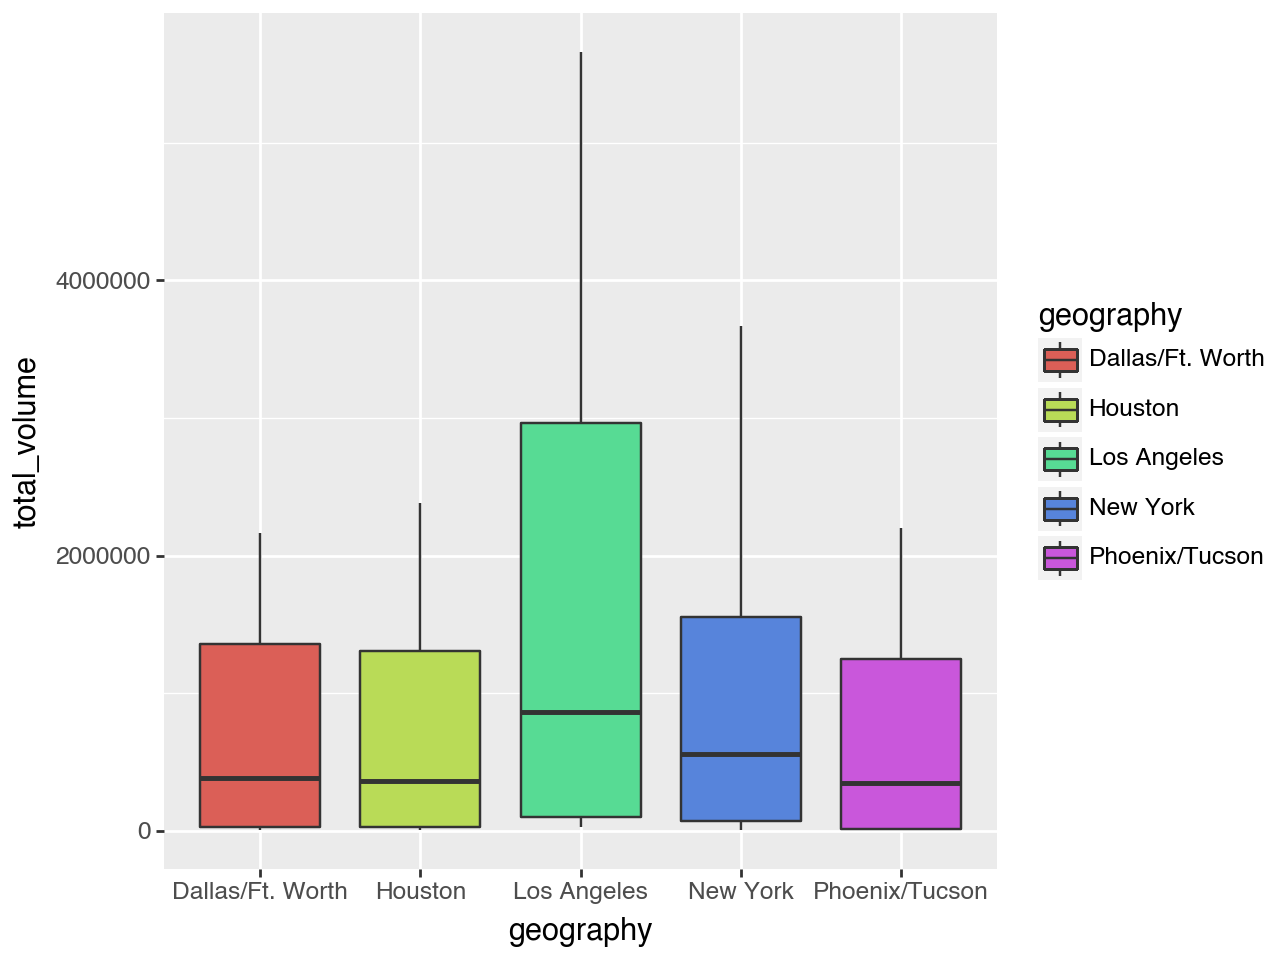

In [38]:
#metro area sold the most total avocados
metros = avocado_clean[(avocado_clean["geography_type"] == "metropolitan")]
tot_avo = metros.groupby('geography')['total_volume'].sum()
tot_avo.nlargest(1)
#top 5 names with highest average
avg_avo = metros.groupby('geography')['total_volume'].mean()
top5 = avg_avo.nlargest(5).index.tolist()
#original data filtered by top5
top5_data = metros[metros['geography'].isin(top5)]
#plot
(ggplot(top5_data, aes(x = "geography", y = "total_volume", fill = "geography"))
    + geom_boxplot()
    )

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

San Francisco (maximum price difference of 1.59 is greater than all other maximum price differences)

       geography      mean  median   min   max       std
0    Los Angeles  0.527778    0.53  0.07  1.21  0.188143
1     Sacramento  0.578497    0.54 -0.09  1.43  0.270029
2      San Diego  0.684510    0.67  0.20  1.41  0.211286
3  San Francisco  0.718954    0.71  0.02  1.59  0.333801
       geography      mean  median   min   max       std
0    Los Angeles  0.527778    0.53  0.07  1.21  0.188143
1     Sacramento  0.578497    0.54 -0.09  1.43  0.270029
2      San Diego  0.684510    0.67  0.20  1.41  0.211286
3  San Francisco  0.718954    0.71  0.02  1.59  0.333801


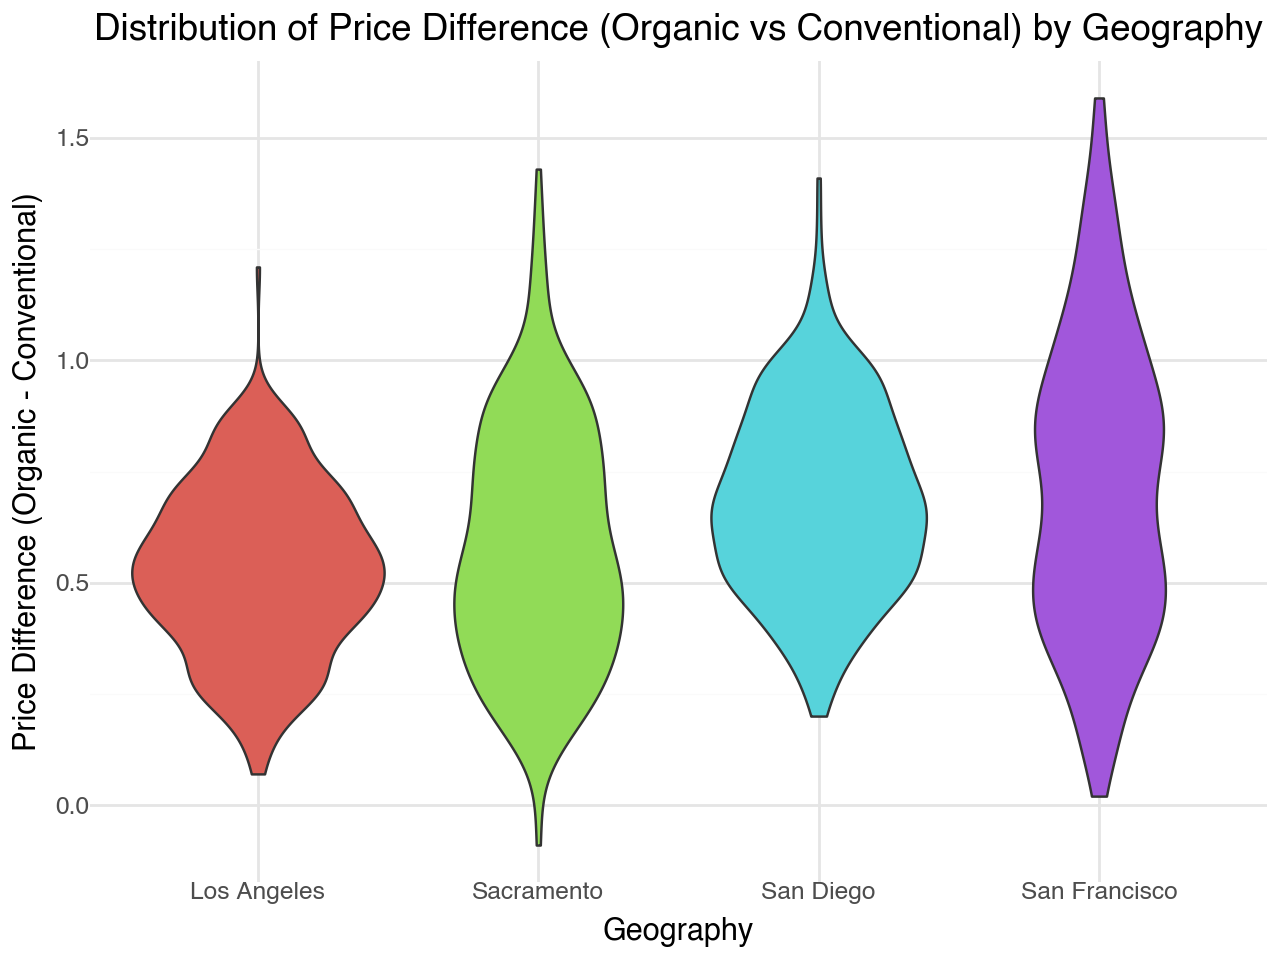

In [39]:
#ca regions
ca = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
#new data set
avocado_ca = avocado_clean[(avocado_clean['geography'].isin(ca))]
#pivot 
pivoted_ca = avocado_ca.pivot_table(index=['geography', 'date'], 
                                    columns='type', 
                                    values='average_price').reset_index()
#create diff column
pivoted_ca['price_diff'] = pivoted_ca['organic'] - pivoted_ca['conventional']
#summary statistics
summary_stats = pivoted_ca.groupby('geography')['price_diff'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
print(summary_stats)
#visualization
(ggplot(pivoted_ca, aes(x='geography', y='price_diff', fill='geography')) 
    + geom_violin() 
    + labs(title="Distribution of Price Difference (Organic vs Conventional) by Geography",
           x="Geography",
           y="Price Difference (Organic - Conventional)") 
    + theme_minimal()
    + theme(legend_position="none")
)

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

Plan: resulting data set needs to have the following attributes:
- variables: type (organic/conventional), size (XLarge, Large, Small), Average Sales (average of total volume variable), geography 

<positron-console-cell-40>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


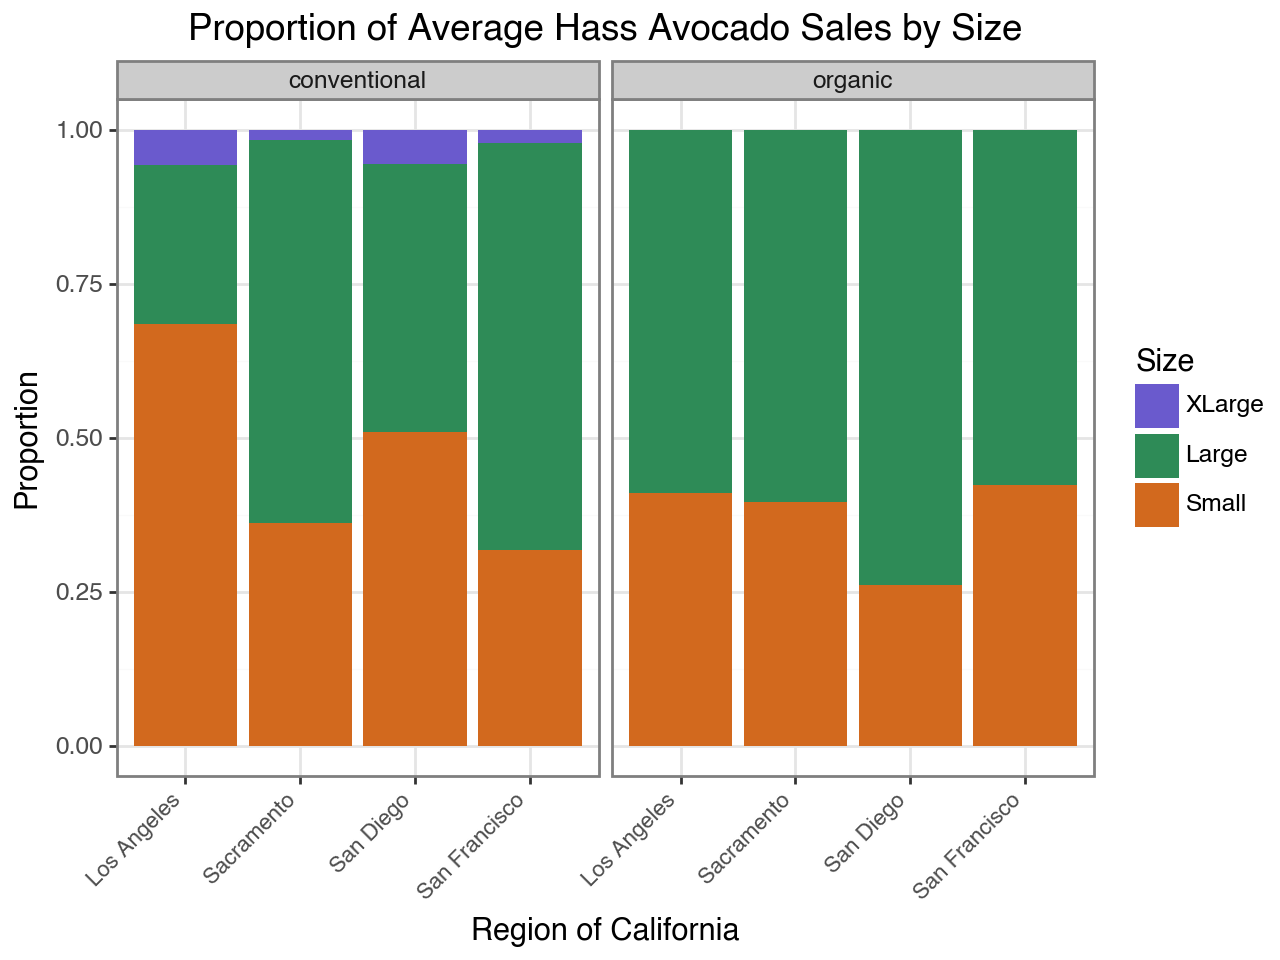

In [40]:
#filter the data for needed variables
filtered_ca = avocado_clean.loc[avocado_clean['geography'].isin(ca), 
                                ['geography', 'type', 'sm_md', 'lg', 'xl', 'total_volume']]

#pivot longer
long_ca = filtered_ca.melt(id_vars=['geography', 'type', 'total_volume'], 
                           value_vars=['sm_md', 'lg', 'xl'], 
                           var_name='size', 
                           value_name='sales')

#rename size cells to match reference
long_ca['size'] = long_ca['size'].map({'xl': 'XLarge', 'lg': 'Large', 'sm_md': 'Small'})
#put in order XL L SM
long_ca['size'] = pd.Categorical(long_ca['size'], categories=['XLarge', 'Large', 'Small'], ordered=True)

#calculate average sales
avg_sales = (long_ca.groupby(['geography', 'type', 'size'], as_index=False)
             .agg(avg_sales=('sales', 'mean')))

#plot using geom_bar
(ggplot(avg_sales, aes(x='geography', y='avg_sales', fill='size'))
        + geom_bar(stat='identity', position='fill')
        + labs(title='Proportion of Average Hass Avocado Sales by Size',
               x='Region of California',
               y='Proportion',
               fill='Size')
        + scale_fill_manual(values=['slateblue', 'seagreen', 'chocolate'])
        + facet_wrap('~type')
        + theme_bw()
        + theme(axis_text_x = element_text(size=8, angle=45, hjust=1))
       )

## Using Outside Data

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

For this analysis I will assume that the average cost for a loaf of bread in California (with 22 slices) is $4.03 (Zippa & HeathierSteps). I will assume for this analysis that a single serving of avocado toast has one slice of bread, and uses one avocado. I will calculate the amount of money (for each year) that a person would spend if they ate 1 avocado toast every day. This would work out to be 352/22 = 16 loaves of bread for the year which was used below to calculate the yearly avocado toast cost. Next, this value was used to calculate how many years it would take (using the money that would otherwise be spent on avocado toast) to save up enough money to purchase a house.

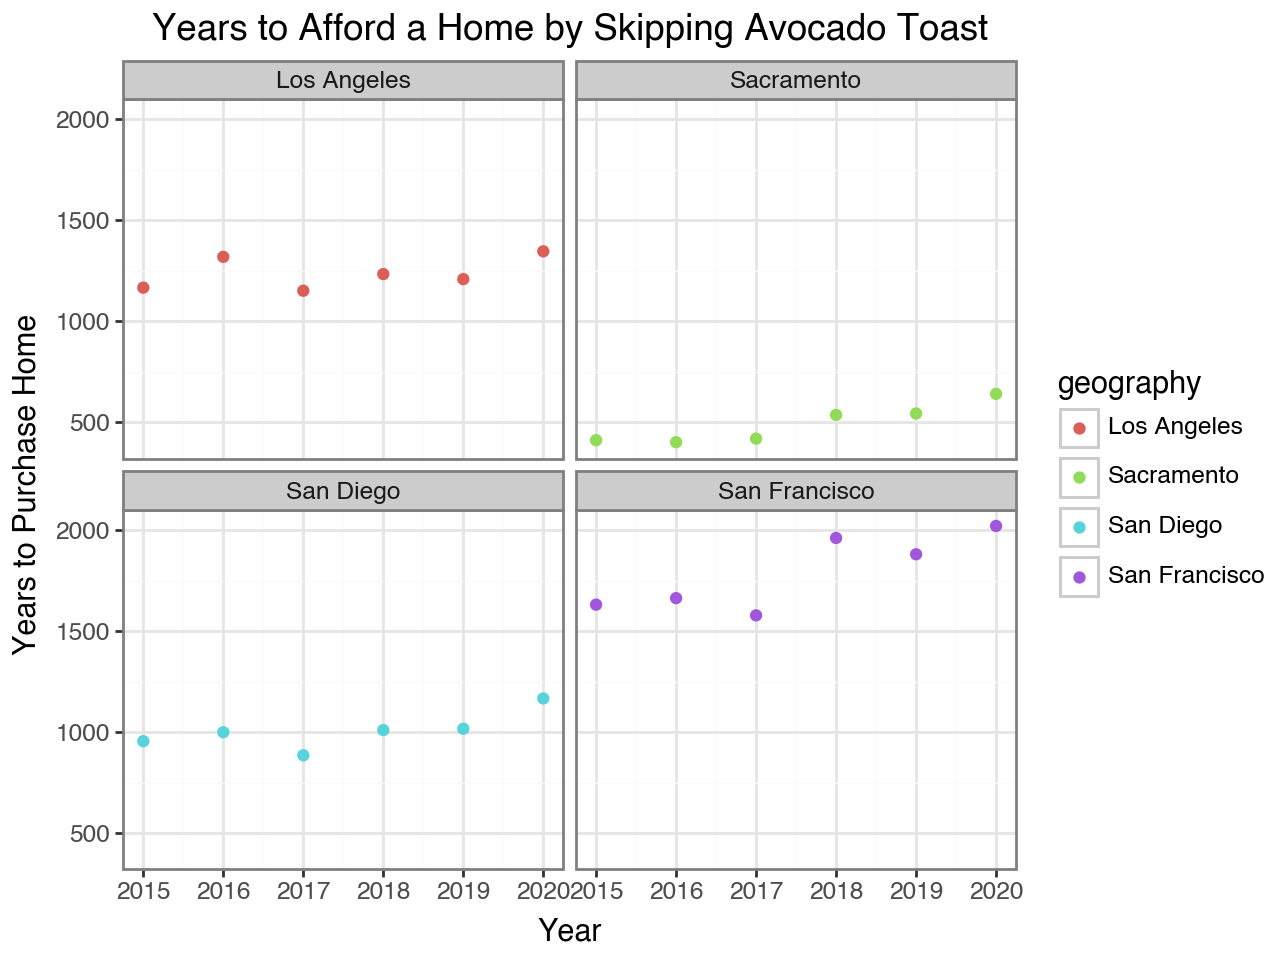

In [54]:
#adjusting avocado data for join
avocado_ca['date'] = pd.to_datetime(avocado_ca['date'])
avocado_ca['year'] = avocado_ca['date'].dt.year
avocado_ca = avocado_ca.drop(columns='price_diff', errors='ignore')
grouped_avocado = avocado_ca.groupby(['geography', 'year', 'type'])['average_price'].mean().reset_index()
pivoted_avocado = grouped_avocado.pivot(index=['geography', 'year'], columns='type', values='average_price').reset_index()
#overall average between conventional and organic
pivoted_avocado['average_price'] = pivoted_avocado[['conventional', 'organic']].mean(axis=1)
#import other dataset
housing = pd.read_excel("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/houseprice.xlsx")
#join on year and geography
merged = housing.merge(pivoted_avocado, on=["year", "geography"])
#yearly avocado toast cost
merged["avocado_toast_cost"] = merged["average_price"] * 352 + (4.03 * 16)
#years to buy home
merged["years_to_buy"] = merged["house_price"]/merged["avocado_toast_cost"]
#plot
(ggplot(merged, aes(x = 'year', y = 'years_to_buy', color = 'geography'))
    + geom_point()
    + labs(x='Year', y='Years to Purchase Home', title = "Years to Afford a Home by Skipping Avocado Toast")
    + facet_wrap('~geography')
    + theme_bw())


The plots illustrate that reallocating money spent on avocado toast to save for a home would take an extraordinary amount of time. In fact, even if someone in San Francisco skipped avocado toast every single day for an entire year, it would still take between 1,500 and 2,000 years to save enough to buy a house. Across all the years and California cities examined, it would hypothetically take anywhere from 500 to 2,000 years to afford a home by cutting out avocado toast — a timeframe far beyond anyone’s lifespan. It is safe to say that avocado toast is not the reason why millenials can't afford houses! 

Appendix and References

- https://loveonetoday.com/how-to/identify-hass-avocados/

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

- https://matplotlib.org/stable/gallery/color/named_colors.html

- https://stackoverflow.com/questions/42599953/ggplot-with-overlapping-x-axis-label

- https://www.zippia.com/advice/loaf-of-bread-costs-each-state/

- https://healthiersteps.com/how-many-slices-in-a-loaf-of-bread/

AI Statement:

Generative AI was used in this lab to assist with brainstorming ideas related to some of the data analysis techniques used. Specifically, AI-supported learning in areas such as indexing a pivot on multiple variables, generating five-number summaries, and organizing visual elements like sorting the legend in the bar chart to align with specific categories (XLarge, Large, Small).